# PARTIE 3 : Régularisation du modèle

Nous entraînons un modèle de régression régularisé pour combattre l'overfitting que l'on a avec un modèle de base.

## Import librairies

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Import des données

In [11]:
dataset = pd.read_csv('./src/dataset_for_ml.csv')
dataset.drop(['Date'], axis=1, inplace=True)
dataset.head()

,Store,Day,Month,Year,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18,2,2011,1572117.54,0.0,59.61,3.045,214.777523,6.858
1,13.0,25,3,2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,6.0,28,5,2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
3,4.0,28,5,2010,1857533.70,0.0,60.77,2.756,126.160226,7.896
4,15.0,3,6,2011,695396.19,0.0,69.80,4.069,134.855161,7.658


## Preprocessings avec Sklearn

In [12]:
# Seperate target variable y from features X:
target_variable = ['Weekly_Sales']
print('Separating labels from features...')
y = dataset.loc[:,target_variable]
X = dataset.drop(target_variable, axis = 1)
print('...Done')
print()
print('y:')
print(y.head())
print()
print('X:')
print(X.head())
print()

# Divide dataset into train set and test set:
print('Dividing into train set and test set...')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('...Done')
print()

# Distinguish numeric and categorical features:
numeric_features = ['Day', 'Month', 'Year', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
categorical_features = ['Store', 'Holiday_Flag']

# Create pipeline for numeric features:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features:
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))
])

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Preprocessings on train set:
print('Performing preprocessings on train set...')
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done')
print(X_train[0:5])
print()

# Preprocessings on test set:
print('Performing preprocessings on test set:')
print(X_test.head())
X_test = preprocessor.transform(X_test)
print('...Done')
print(X_test[0:5])
print()

Separating labels from features...
...Done

y:
   Weekly_Sales
0    1572117.54
1    1807545.43
2    1644470.66
3    1857533.70
4     695396.19

X:
   Store  Day  Month  Year  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0    6.0   18      2  2011           0.0        59.61       3.045  214.777523   
1   13.0   25      3  2011           0.0        42.38       3.435  128.616064   
2    6.0   28      5  2010           0.0        78.89       2.759  212.412888   
3    4.0   28      5  2010           0.0        60.77       2.756  126.160226   
4   15.0    3      6  2011           0.0        69.80       4.069  134.855161   

   Unemployment  
0         6.858  
1         7.470  
2         7.092  
3         7.896  
4         7.658  

Dividing into train set and test set...
...Done

Performing preprocessings on train set...
     Store  Day  Month  Year  Holiday_Flag  Temperature  Fuel_Price  \
109    7.0   25      5  2012           0.0        50.60       3.804   
13     6.0   30      4  

In [540]:
dataset.head()

,Store,Day,Month,Year,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18,2,2011,1572117.54,0.0,59.61,3.045,214.777523,6.858
1,13.0,25,3,2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,6.0,28,5,2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
3,4.0,28,5,2010,1857533.70,0.0,60.77,2.756,126.160226,7.896
4,15.0,3,6,2011,695396.19,0.0,69.80,4.069,134.855161,7.658


# A. Modèle de régression Ridge

Nous essayons ici le modèle de régression linéaire régularisé Ridge.

Selon la documentation, le modèle Ridge est adapté lorsque nous avons des variables fortement corrélées entre elles. 

C'est le cas des variables Month avec Temperature, ou encore des variables Fuel_Price et Year.

(Voir la matrice de corrélation dans le notebook partie_1.ipynb)

## Recherche du meilleur alpha

Nous recherchons le meilleur hyperparamètre de régularisation alpha pour notre modèle de régression linéaire Ridge.

In [528]:
alphas = [i / 100 for i in range(105, 155, 5)]
print(len(alphas))
alphas

10


[1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5]

In [529]:
param_grid = {'alpha': alphas}
ridge = Ridge()

best_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5)
best_ridge.fit(X_train, y_train)

print(best_ridge.best_params_)
print(best_ridge.best_score_)

{'alpha': 1.05}
0.792742666765531


In [530]:
print("RIDGE, R2 score on train set : ", best_ridge.score(X_train, y_train))
print("RIDGE, R2 score on test set : ", best_ridge.score(X_test, y_test))

RIDGE, R2 score on training set :  0.9277751177126579
RIDGE, R2 score on test set :  0.9250674465901909


## Résultats & performance

Avec une valeur alpha de 1.05, on obtient un R2 score de 0.9277 et de 0.9250 sur le train set et le test set.

--> Grâce à la régularisation nous avons réussi à minimiser l'écart entre le R2 score en phase de train et de test, tout en conservant une valeur élevée et la plus proche de 1.

## Importance des features

In [775]:
# Get the names and coefficients of the features:
feature_names_out = preprocessor.get_feature_names_out()
feature_names = [fname for fname in feature_names_out]
coefs = pd.DataFrame(index = feature_names, data = best_ridge.best_estimator_.coef_.transpose(), columns=["coefficients"])

In [770]:
negative_coefs = feature_importance[feature_importance['coefficients']<0]

In [771]:
# Compute abs() and sort values:
feature_importance_abs = abs(coefs).sort_values(by='coefficients', ascending=False)

In [773]:
feature_importance_abs = feature_importance_abs.transpose()
feature_importance_abs

,cat__Store_3.0,cat__Store_5.0,cat__Store_7.0,cat__Store_4.0,cat__Store_9.0,cat__Store_16.0,cat__Store_14.0,cat__Store_15.0,cat__Store_13.0,cat__Store_2.0,...,cat__Store_11.0,num__Month,num__Temperature,num__Unemployment,num__Day,num__CPI,num__Year,num__Fuel_Price,cat__Store_19.0,cat__Holiday_Flag_1.0
coefficients,812626.244852,806541.116966,723944.313109,682916.326195,594121.552512,593707.712621,584652.981227,547302.587453,522918.107469,515016.691722,...,191758.698132,64438.118174,52766.709411,46360.71976,41016.019184,37458.378135,25203.894326,22245.652215,5319.130511,1545.060013


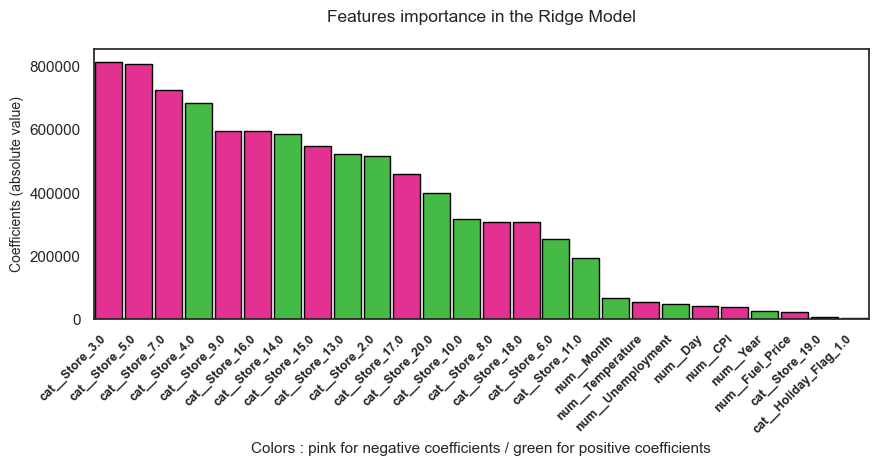

In [774]:
# Plot coefficients (in absolute value):
import seaborn as sns
import matplotlib.pyplot as plt 

colors = ['deeppink' if y in negative_coefs.index else 'limegreen' for y in feature_importance_abs.columns]
sns.set(rc={'figure.figsize':(10, 3.5)}, style='white')
sns.barplot(data = feature_importance_abs,orient = 'v', palette = colors, width = .9, edgecolor = 'black')
plt.title('Features importance in the Ridge Model', fontsize=12.5, pad=20)
plt.xlabel('Colors : pink for negative coefficients / green for positive coefficients', fontsize=11)
plt.ylabel('Coefficients (absolute value)', fontsize=10)
plt.xticks(fontsize=9, fontweight='bold', rotation=45, ha='right')
plt.xticks(feature_importance_abs.columns, fontsize=9, fontweight='bold', rotation=45, ha="right")
plt.legend('', frameon=False)
plt.show()

# B. Modèle de régression Lasso

Nous testons un modèle de régression linéaire régularisé Lasso.

L'étude de l'importance des features nous a montré que les prédictions sont calculées à partir de 26 features différentes.

Ce nombre de features est important alors que nous avons uniquement 118 observations dans notre jeu de données.

Lasso permettra de simplifier le modèle en supprimant certaines features en y appliquant un poids de 0.

## Recherche du meilleur alpha

Nous recherchons le meilleur hyperparamètre de régularisation alpha pour notre modèle de régression linéaire Lasso.

In [663]:
alphas = [i for i in range(3000, 5000, 100)]
print(len(alphas))
alphas

20


[3000,
 3100,
 3200,
 3300,
 3400,
 3500,
 3600,
 3700,
 3800,
 3900,
 4000,
 4100,
 4200,
 4300,
 4400,
 4500,
 4600,
 4700,
 4800,
 4900]

In [664]:
param_grid = {'alpha': alphas}
lasso = Lasso()

best_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5)
best_lasso.fit(X_train, y_train)

print(best_lasso.best_params_)
print(best_lasso.best_score_)

{'alpha': 3000}
0.8883991233063891


In [665]:
print("LASSO, R2 score on train set : ", best_lasso.score(X_train, y_train))
print("LASSO, R2 score on test set : ", best_lasso.score(X_test, y_test))

LASSO, R2 score on train set :  0.959923796786412
LASSO, R2 score on test set :  0.9541634407734857


## Résultats & performance

Avec une valeur alpha de 3000, on obtient un R2 score de 0.9599 et de 0.9541 sur le train set et le test set.

--> Grâce à la régularisation nous avons réussi à minimiser l'écart entre le R2 score en phase de train et de test, tout en conservant une valeur élevée et la plus proche de 1.

--> Nous obtenons un meilleur modèle de prédictions avec le Lasso plutôt que le Ridge avec un R2 score de 0.95 contre 0.92.

## Importance des features

In [761]:
# Get the names and coefficients of the features:
feature_names_out = preprocessor.get_feature_names_out()
feature_names = [fname for fname in feature_names_out]
coefs = pd.DataFrame(index = feature_names, data = best_lasso.best_estimator_.coef_.transpose(), columns=["coefficients"])

In [762]:
negative_coefs = feature_importance[feature_importance['coefficients']<0]

In [763]:
# Compute abs() and sort values:
feature_importance_abs = abs(coefs).sort_values(by='coefficients', ascending=False)
feature_importance_abs_drop = feature_importance_abs[feature_importance_abs['coefficients'] <= 0]
feature_importance_abs_remain = feature_importance_abs[feature_importance_abs['coefficients'] > 0]

Le modèle Lasso a éliminé 5 features : Umemployment, Year, Holiday_Flag et les magasins n°11 et 19.

In [764]:
feature_importance_abs_drop

,coefficients
cat__Store_11.0,0.0
num__Unemployment,0.0
cat__Store_19.0,0.0
num__Year,0.0
cat__Holiday_Flag_1.0,0.0


In [766]:
feature_importance_abs_remain = feature_importance_abs_remain.transpose()
feature_importance_abs_remain

,cat__Store_5.0,cat__Store_3.0,cat__Store_9.0,cat__Store_16.0,cat__Store_7.0,cat__Store_15.0,cat__Store_4.0,cat__Store_14.0,cat__Store_17.0,cat__Store_8.0,...,cat__Store_2.0,cat__Store_10.0,cat__Store_20.0,cat__Store_18.0,num__Month,num__Temperature,num__Day,cat__Store_6.0,num__CPI,num__Fuel_Price
coefficients,1.127095e+06,1.070332e+06,927278.336339,900584.118015,899811.062594,671171.429264,663408.606465,585951.946835,568299.800003,548015.036705,...,424963.87429,347336.878735,288175.320169,287697.626241,61409.117017,44706.183567,35677.000785,35621.461785,30209.326462,10954.264948


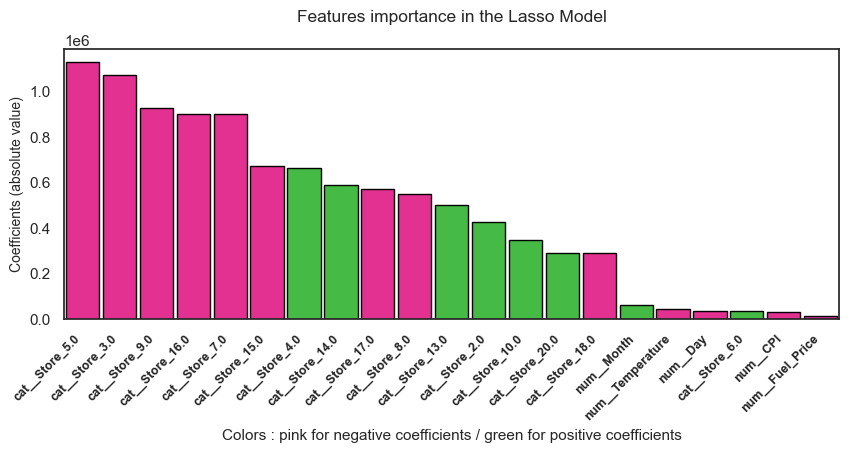

In [768]:
# Plot coefficients (in absolute value):
import seaborn as sns
import matplotlib.pyplot as plt 

colors = ['deeppink' if y in negative_coefs.index else 'limegreen' for y in feature_importance_abs_remain.columns]
sns.set(rc={'figure.figsize':(10, 3.5)}, style='white')
sns.barplot(data = feature_importance_abs_remain,orient = 'v', palette = colors, width = .9, edgecolor = 'black')
plt.title('Features importance in the Lasso Model', fontsize=12.5, pad=20)
plt.xlabel('Colors : pink for negative coefficients / green for positive coefficients', fontsize=11)
plt.ylabel('Coefficients (absolute value)', fontsize=10)
plt.xticks(fontsize=9, fontweight='bold', rotation=45, ha='right')
plt.xticks(feature_importance_abs_remain.columns, fontsize=9, fontweight='bold', rotation=45, ha="right")
plt.legend('', frameon=False)
plt.show()

# Conclusion

- Résultats de l'analyse : 

    - L'analyse des données en partie 1 avait tout d'abord mis en avant que les ventes hebdomadaires étaient très variables d'un magasin à l'autre, et également d'un mois à l'autre.

    - Les nuages de points ne nous ont pas permis de déceler de relation corrélée entre les ventes hebdomadaires et les indicateurs économiques.

    - La matrice de corrélation a suggéré une corrélation positive entre les ventes hebdomadaires et le taux de chômage, et une corrélation négative avec l'index d'inflation.

- Résultats des modèles : 

    - Le modèle de prédiction Lasso est celui qui obtient les meilleures performances : il réalise peu d'erreurs et ne sur-apprend pas.

    - Il confirme l'importance des magasins pour calculer les prévisions de ventes (sauf pour le magasin n°6 dont le coefficient est seulement de 35 000).
    
    - La variable Month est conservée mais son importance est réduite par rapport au modèle de base (coefficient de 60 000 contre 75 000).

    - Il infirme l'importance du taux de chômage pour calculer les prévisions de ventes. Le modèle supprime cette variable et ne la prend pas en compte dans ses prédictions. 
    
    - Enfin, le poids de l'index d'inflation est réduit de plus de 10 fois : le coefficient vaut 30 000 dans le modèle Lasso contre 310 000 dans le modèle de base.
